# Generating images with Stable diffusion

## Checking the GPU support

In [ ]:
!nvidia-smi

Thu Sep 15 04:04:38 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Installing the dependencies

In [ ]:
!pip install diffusers==0.3.0
!pip install transformers scipy ftfy
!pip install ipywidgets==7.7.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 153 kB 32.2 MB/s 
     |████████████████████████████████| 120 kB 71.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.9 MB 27.9 MB/s 
     |████████████████████████████████| 53 kB 2.3 MB/s 
     |████████████████████████████████| 6.6 MB 60.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 123 kB 29.5 MB/s 
     |████████████████████████████████| 245 kB 59.5 MB/s 
     |████████████████████████████████| 1.6 MB 62.8 MB/s 
  Attempting uninstall: jupyterlab-widgets
    Found existing installation: jupyterlab-widgets 3.0.3
    Uninstalling jupyterlab-widgets-3.0.3:
      Successfully uninstalled jupyterlab-widgets-3.0.3
  Attempting uninstall: ipywidgets
    Fo

## Logging the notebook

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

For getting the access to the model you need to accept the terms and
condition of the utilization of the stable diffusion model which is [here](https://huggingface.co/CompVis/stable-diffusion-v1-4)

Once the model is accessable you need to register this notebook on hugging face. To do so login using the token which could be done by creating the token which is present [here](https://huggingface.co/settings/tokens)

In [ ]:
from huggingface_hub import notebook_login
notebook_login()

Login successful
Your token has been saved to /root/.huggingface/token
Authenticated through git-credential store but this isn't the helper defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub. Run the following command in your terminal in case you want to set this credential helper as the default

git config --global credential.helper store


## Importing the dependencies

In [ ]:
import torch
from torch import autocast
from diffusers import StableDiffusionPipeline
from PIL import Image

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


Moving 0 files to the new cache system


0it [00:00, ?it/s]

## Creating the pipeline

In [ ]:
experimental_pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", revision="fp16", torch_dtype=torch.float16, use_auth_token=True)

Downloading:   0%|          | 0.00/1.34k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/12.5k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/342 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/543 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.63k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/608M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/209 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/209 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/572 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/246M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/525k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/472 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/788 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/772 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/71.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/550 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/167M [00:00<?, ?B/s]

{'trained_betas'} was not found in config. Values will be initialized to default values.


### Shift the pipeline

For faster inferences move the pipeline to the GPU accelerator.

In [ ]:
experimental_pipe = experimental_pipe.to("cuda")

## Generating the image

In [ ]:
description_1 = "a photograph of an horse on moon"
with autocast("cuda"):
  image_1 = experimental_pipe(description_1).images[0]
# Now to display an image you can do either save it such as:
image_1.save(f"horse_moon.png")

  0%|          | 0/51 [00:00<?, ?it/s]

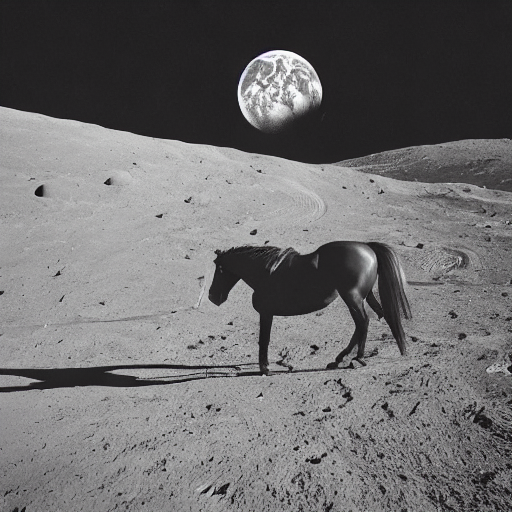

In [ ]:
image_1

In [ ]:
description_2 = "dog sitting in a field of autumn leaves"
with autocast("cuda"):
  image_2 = experimental_pipe(description_2).images[0]
# Now to display an image you can do either save it such as:
image_2.save(f"dog_leaves.png")

  0%|          | 0/51 [00:00<?, ?it/s]

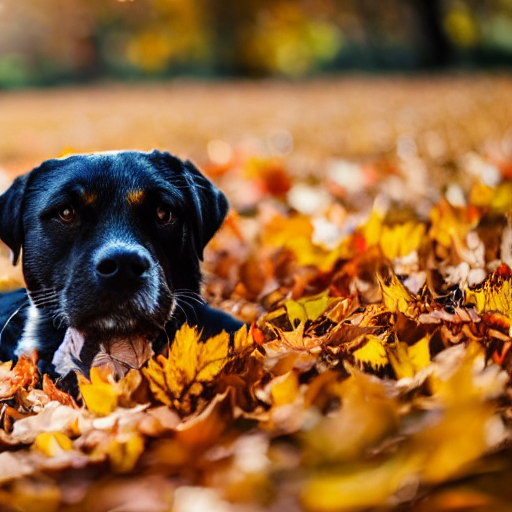

In [ ]:
image_2

### Grids for images

In [ ]:
def grids(img, rows, cols):
    assert len(img) == rows*cols

    width, height = img[0].size
    grid = Image.new('RGB', size=(cols*width, rows*height))
    grid_width, grid_heigth = grid.size

    for i, img in enumerate(img):
        grid.paste(img, box=(i%cols*width, i//cols*height))
    return grid

  0%|          | 0/51 [00:00<?, ?it/s]

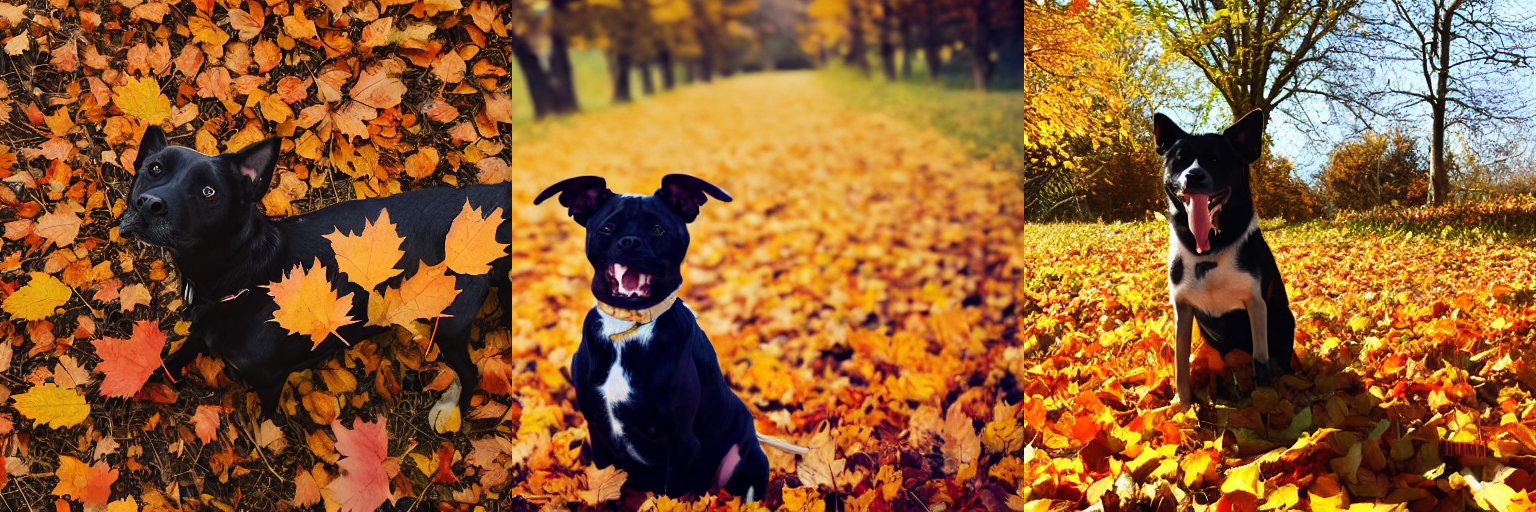

In [ ]:
num_images = 3
description = [description_2]*num_images
with autocast("cuda"):
  experiment_image = experimental_pipe(description).images

grid = grids(experiment_image, rows=1, cols=3)
grid

  0%|          | 0/51 [00:00<?, ?it/s]

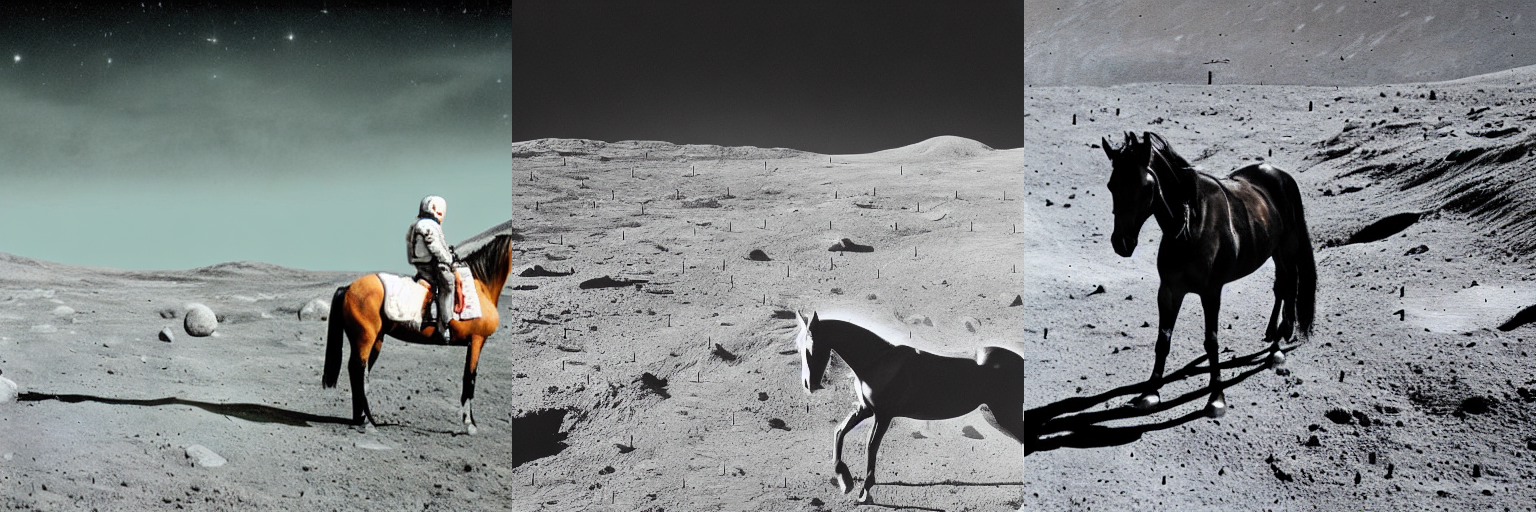

In [ ]:
num_images = 3
description = [description_1]*num_images
with autocast("cuda"):
  experiment_image = experimental_pipe(description).images

grid_2 = grids(experiment_image, rows=1, cols=3)
grid_2